In [47]:
# Importing the libraries

import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

# Importing the dataset

#from pandas.plotting import scatter_matrix

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import mean_absolute_error

from sklearn import preprocessing

In [48]:
%matplotlib inline

# Common seed value to be used whenever required
seed = 79
np.random.seed(seed)

In [49]:
a=["T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9","RH_1", "RH_2", "RH_3", "RH_4", "RH_5", "RH_6", "RH_7", "RH_8", "RH_9","T_out", "Tdewpoint", "RH_out", "Press_mm_hg", "Windspeed", "Visibility","Appliances"]
#load the datasets
energy = pd.read_csv(r"C:\Users\chandan sharma\Desktop\research\-------------MOST\final project\Data-driven-prediction-models-of-energy-use-of-appliances-in-a-low-energy-house-master\dataset\training.csv",usecols=a)

In [50]:
test = pd.read_csv(r"C:\Users\chandan sharma\Desktop\research\-------------MOST\final project\Data-driven-prediction-models-of-energy-use-of-appliances-in-a-low-energy-house-master\dataset\testing_validation.csv",usecols=a)

In [51]:

from time import time

# Prepare the data
X_train = energy.drop("Appliances", axis=1)
y_train = energy["Appliances"]

In [52]:
# Separate the features and the target variable
X_test = test.drop("Appliances", axis=1)
y_test = test["Appliances"]


In [53]:
energy.describe()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
count,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,...,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000,14803.000000
mean,98.011214,21.684167,40.271439,20.342506,40.418056,22.262628,39.249149,20.855433,39.030359,19.585043,...,22.029160,42.924554,19.480759,41.542065,7.413018,755.502983,79.734122,4.034470,38.330141,3.756859
std,102.828019,1.607780,3.981741,2.191842,4.066223,2.013785,3.252755,2.044786,4.339783,1.847725,...,1.958897,5.242376,2.017733,4.150839,5.323843,7.427684,14.955609,2.436870,11.812780,4.200297
min,10.000000,16.790000,27.023333,16.100000,20.893333,17.200000,28.766667,15.100000,27.660000,15.330000,...,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000
25%,50.000000,20.730000,37.361667,18.823333,37.900000,20.790000,36.900000,19.500000,35.530000,18.265000,...,20.790000,39.060000,18.000000,38.500000,3.666667,750.866667,70.000000,2.000000,29.000000,0.900000
50%,60.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,...,22.128571,42.363333,19.390000,40.863333,6.900000,756.100000,83.666667,3.666667,40.000000,3.450000
75%,100.000000,22.600000,43.090000,21.500000,43.290000,23.290000,41.761667,22.100000,42.130000,20.600000,...,23.390000,46.561667,20.600000,44.363333,10.400000,760.933333,91.666667,5.500000,40.000000,6.533333
max,1080.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.063333,25.745000,...,27.230000,58.780000,24.500000,53.326667,25.966667,772.300000,100.000000,13.500000,66.000000,15.500000


In [54]:
X_test

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,...,18.100000,48.590000,17.000000,45.400000,6.250,733.800000,92.000000,6.000000,51.500000,5.0000
1,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,45.790000,17.100000,54.966667,...,18.100000,48.590000,17.000000,45.290000,5.900,734.100000,92.000000,5.000000,40.000000,4.7000
2,19.926667,45.863333,19.356667,44.400000,19.790000,44.900000,18.890000,46.430000,17.100000,55.000000,...,18.100000,48.590000,17.000000,45.290000,5.970,734.366667,91.333333,5.666667,40.000000,4.6300
3,20.066667,46.396667,19.426667,44.400000,19.790000,44.826667,19.000000,46.430000,17.100000,55.000000,...,18.066667,48.633333,16.890000,45.290000,5.980,734.433333,91.166667,5.833333,40.000000,4.6200
4,20.566667,53.893333,20.033333,46.756667,20.100000,48.466667,19.000000,48.490000,17.150000,56.042500,...,18.150000,49.200000,16.890000,45.326667,6.000,734.850000,89.500000,6.000000,40.000000,4.3500
5,20.856667,53.660000,20.200000,47.056667,20.200000,48.447500,18.890000,47.963333,17.200000,56.933333,...,18.356667,50.026667,16.890000,45.290000,6.000,735.083333,88.500000,6.000000,40.000000,4.1800
6,20.963333,47.633333,20.260000,45.530000,20.200000,47.026667,19.260000,49.696667,17.666667,79.730000,...,18.856667,50.290000,16.890000,45.126667,6.000,735.300000,87.500000,6.000000,40.000000,4.0000
7,21.033333,47.063333,20.290000,45.223333,20.260000,46.826667,19.323333,49.166667,17.600000,79.256667,...,18.890000,50.163333,16.890000,45.060000,6.000,735.333333,87.333333,6.000000,40.000000,3.9700
8,21.356667,45.826667,20.666667,45.163333,20.390000,46.090000,19.390000,47.500000,18.600000,62.430000,...,19.200000,49.433333,16.890000,44.790000,5.800,735.600000,87.500000,6.000000,40.000000,3.8000
9,21.600000,44.200000,21.000000,43.700000,20.500000,45.590000,20.996667,47.030000,19.222500,51.520000,...,19.290000,49.230000,16.890000,44.500000,5.850,736.216667,87.166667,6.833333,40.000000,3.7800


In [55]:
y_test

0        50
1        60
2       230
3       580
4       100
5        70
6       190
7       110
8       100
9        60
10      380
11      370
12       50
13       50
14       40
15       20
16       50
17       40
18       50
19       40
20       50
21       70
22       60
23       60
24      500
25       60
26      170
27       60
28      140
29       60
       ... 
1969     50
1970     60
1971     80
1972    150
1973     60
1974    700
1975    270
1976    630
1977    410
1978     50
1979    180
1980    410
1981    220
1982     90
1983    190
1984    100
1985    120
1986    120
1987    100
1988    100
1989     90
1990     60
1991     50
1992     60
1993     50
1994     40
1995     20
1996     30
1997     50
1998     50
Name: Appliances, Length: 1999, dtype: int64

In [56]:
y_train

0         60
1         60
2         50
3         60
4         50
5         60
6         60
7         70
8        430
9        250
10       100
11        90
12        80
13       140
14       120
15       110
16       110
17       110
18       100
19       100
20       100
21       110
22       400
23       400
24       390
25       240
26        60
27        60
28        50
29        70
        ... 
14773    230
14774    220
14775     90
14776     70
14777    370
14778    280
14779    240
14780    250
14781    220
14782    190
14783    160
14784     80
14785     60
14786     60
14787     60
14788     70
14789     80
14790     80
14791     70
14792    100
14793     90
14794    100
14795    220
14796    180
14797    120
14798    110
14799     90
14800     90
14801    420
14802    430
Name: Appliances, Length: 14803, dtype: int64

In [57]:
             ########convert the Y_test column data to a list
scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)


In [58]:
# Importing the Keras libraries and packages

from keras.models import Sequential

	
from keras.layers import Dense, Dropout, Activation, Flatten
import numpy



In [59]:

#Initializing Neural Network

classifier = Sequential()


In [60]:
classifier.add(Dense(activation="relu", input_dim=25, units=6, kernel_initializer="uniform"))

#classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 12))

# Adding the second hidden layer

classifier.add(Dense(activation="relu", units=8, kernel_initializer="uniform"))

#classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

# Adding the output layer

#classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'relu'))

classifier.add(Dense(activation="relu", units=8, kernel_initializer="uniform"))

classifier.add(Dense(activation="relu", units=7, kernel_initializer="uniform"))

classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

 

classifier.add(Dense(activation="relu", units=1, kernel_initializer="uniform"))

# Compiling Neural Network

classifier.compile(optimizer = 'RMSprop', loss = 'mean_squared_error',metrics=['mse'])

# Fitting our model


In [61]:
# Fitting our model

classifier.fit(X_train, y_train, epochs = 90,)    #, batch_size = 64

ValueError: Error when checking input: expected dense_43_input to have shape (25,) but got array with shape (24,)

In [62]:
# Predicting the Test set results

Y_pred = classifier.predict(X_test)


ValueError: Error when checking input: expected dense_43_input to have shape (25,) but got array with shape (24,)

In [80]:
print("percentage error:",(np.mean(np.abs(Y_test - Y_pred) / Y_test)*100))

percentage error: 114.9637501511372


In [81]:
Y_test

array([ 50.,  60., 230., ...,  30.,  50.,  50.])

In [82]:
Y_pred

array([[ 50.125267],
       [ 60.207764],
       [230.28099 ],
       ...,
       [ 30.025808],
       [ 49.96041 ],
       [ 49.917854]], dtype=float32)

In [87]:
q=np.abs(Y_test-Y_pred)

In [95]:
p=q/Y_test

In [96]:
p

array([[2.50534058e-03, 1.64578883e-01, 7.82064056e-01, ...,
        6.70842234e-01, 2.50534058e-03, 2.50534058e-03],
       [2.04155273e-01, 3.46272786e-03, 7.38227114e-01, ...,
        1.00692546e+00, 2.04155273e-01, 2.04155273e-01],
       [3.60561981e+00, 2.83801651e+00, 1.22169826e-03, ...,
        6.67603302e+00, 3.60561981e+00, 3.60561981e+00],
       ...,
       [3.99483833e-01, 4.99569861e-01, 8.69453007e-01, ...,
        8.60277812e-04, 3.99483833e-01, 3.99483833e-01],
       [7.91778564e-04, 1.67326482e-01, 7.82780821e-01, ...,
        6.65347036e-01, 7.91778564e-04, 7.91778564e-04],
       [1.64291382e-03, 1.68035762e-01, 7.82965851e-01, ...,
        6.63928477e-01, 1.64291382e-03, 1.64291382e-03]])

In [98]:
np.mean(p)

1.149637501511372

In [99]:
np.mean(q)

88.97586927126189

In [100]:
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))

Mean squared error: 0.15


In [101]:
print('R2 score: %.2f' % r2_score(Y_test, Y_pred))

R2 score: 1.00


In [102]:
    print("Mean absolute error:%.2f" % mean_absolute_error(Y_test, Y_pred))

Mean absolute error:0.29


In [104]:
from math import sqrt
meanSquaredError=mean_squared_error(Y_test, Y_pred)
print("MSE:", meanSquaredError)
rootMeanSquaredError = sqrt(meanSquaredError)
print("RMSE:", rootMeanSquaredError)


MSE: 0.15483326625012367
RMSE: 0.39348858465033476


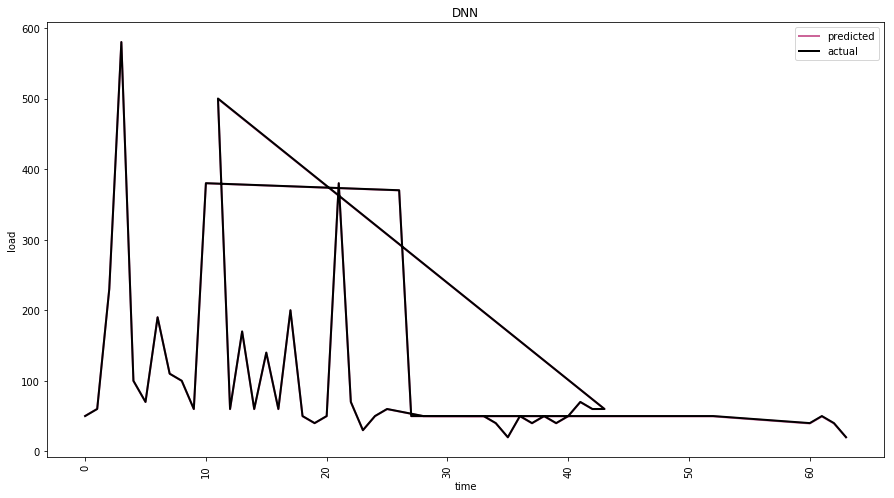

In [109]:
plt.figure(figsize=(15,8))

#plt.scatter(df2['datetime'][0:50], Y_test[0:50], s=20, edgecolor="black",c="darkorange", label="actual load")

plt.plot(df2['date'][0:50], Y_pred[0:50], color="#cc6699", label="predicted", linewidth=2)

plt.plot(df2['date'][0:50], Y_test[0:50], color="black", label="actual", linewidth=2)

 

plt.xlabel("time")

plt.ylabel("load")

plt.xticks(rotation=90)

plt.title("DNN")

plt.legend()

plt.show()